In [44]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file ( zoo data CSV ) and check the data dimension

In [45]:
zoo_df = pd.read_csv('zoo.csv')
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [46]:
zoo_df.shape

(101, 18)

The data has 101 records and 18 columns.

### Q2. Drop animal_name 


In [47]:
zoo_df.drop('animal_name',axis=1,inplace=True)

In [48]:
zoo_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


'animal_name' column has been dropped successfully.

### Q3 Check distribution of target variable

In [49]:
zoo_df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

(array([41., 20.,  0.,  5.,  0., 13.,  4.,  0.,  8., 10.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

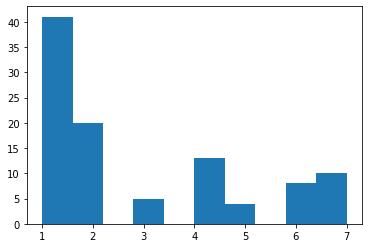

In [50]:
plt.hist(zoo_df['class_type'])

### Q4. Check for missing values

In [51]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
hair          101 non-null int64
feathers      101 non-null int64
eggs          101 non-null int64
milk          101 non-null int64
airborne      101 non-null int64
aquatic       101 non-null int64
predator      101 non-null int64
toothed       101 non-null int64
backbone      101 non-null int64
breathes      101 non-null int64
venomous      101 non-null int64
fins          101 non-null int64
legs          101 non-null int64
tail          101 non-null int64
domestic      101 non-null int64
catsize       101 non-null int64
class_type    101 non-null int64
dtypes: int64(17)
memory usage: 13.5 KB


In [52]:
zoo_df.isna().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

All the entries are non-null under all columns, showing that there are no missing values in the dataset.

### Q5. Import class file and understand the data

In [53]:
class_df = pd.read_csv('class.csv')
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


class_df dataset provides the discription of each of the 7 classes in details as class_type and animal_names.
For example, 41 animals belonging to the class 1 are mammals such as aardvark, antelope, bear, boar, buffalo, calf,...
Similarly 20 animals in class 2 are Birds such as chicken, crow, dove, duck, flamingo, gull, haw.. and so on.

### Q6. Standardize the data 

Distributing the original data into a dataframe with the features and a separate dataframe with just the labels separatein order to remove any bias to be introduced during clustering.

In [55]:
zoo_df_X = zoo_df.drop('class_type',axis=1)

In [56]:
zoo_df_y = zoo_df.pop('class_type')

In [57]:
from scipy.stats import zscore

In [58]:
zoo_df_std = zoo_df_X.apply(zscore)
zoo_df_std

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


### Q7. Find out the linkage matrix

In [59]:
from scipy.cluster.hierarchy import linkage

In [74]:
Z = linkage(zoo_df_std, method='ward', metric='euclidean')

In [75]:
print(Z)

[[  0.           3.           0.           2.        ]
 [  1.           5.           0.           2.        ]
 [  2.           8.           0.           2.        ]
 [ 17.         102.           0.           3.        ]
 [ 22.         104.           0.           4.        ]
 [ 28.         105.           0.           5.        ]
 [ 55.         106.           0.           6.        ]
 [  4.          10.           0.           2.        ]
 [  6.          31.           0.           2.        ]
 [ 34.          73.           0.           2.        ]
 [ 82.         110.           0.           3.        ]
 [ 12.         103.           0.           3.        ]
 [ 38.         112.           0.           4.        ]
 [ 61.         113.           0.           5.        ]
 [ 18.          60.           0.           2.        ]
 [ 92.         115.           0.           3.        ]
 [ 65.         109.           0.           3.        ]
 [ 70.         117.           0.           4.        ]
 [ 44.    

We'll now use the cophenetic correlation coefficient 'c' value to numerically validate the clusters that can be formed from linkage matrix.

In [76]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(zoo_df_std))
c

0.7731941387559728

'c' value closer to 1 is considered ideal, hence we have a good linkage matrix for clustering here.

### Q8. Plot the dendrogram.

In [77]:
from scipy.cluster.hierarchy import dendrogram

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

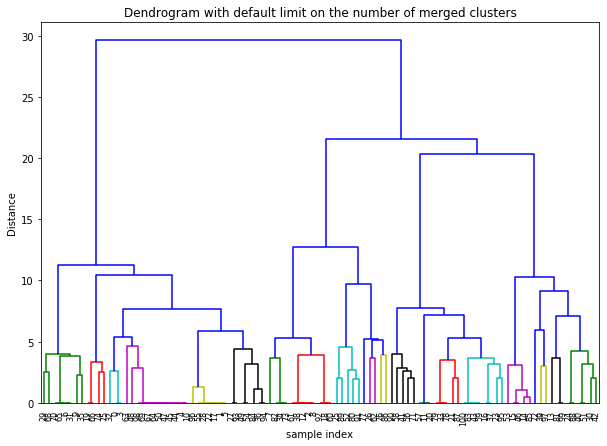

In [78]:
plt.figure(figsize=(10,7))
dendrogram(Z, leaf_rotation=90., color_threshold = 5, leaf_font_size=8.)
plt.title('Dendrogram with default limit on the number of merged clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout

### Q9. Recreate the dendrogram for the last 4, 7, and 12 merged clusters 

Last 4 merged clusters:

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

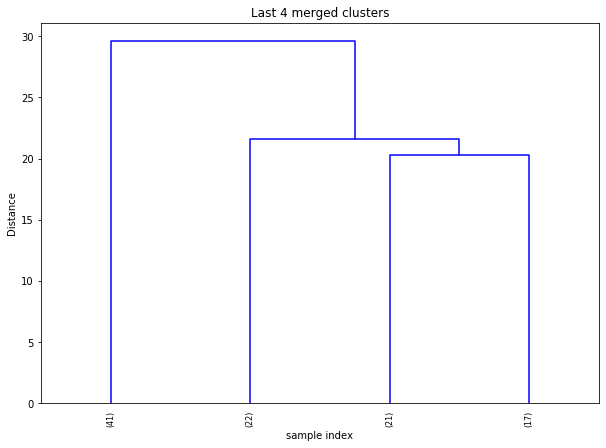

In [79]:
plt.figure(figsize=(10,7))
dendrogram(Z, leaf_rotation=90., color_threshold = 3, leaf_font_size=8., p=4, truncate_mode='lastp')
plt.title('Last 4 merged clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout

Last 7 merged clusters:

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

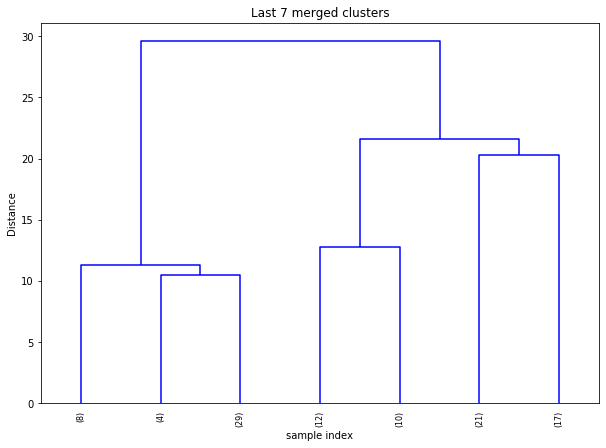

In [80]:
plt.figure(figsize=(10,7))
dendrogram(Z, leaf_rotation=90., color_threshold = 6, leaf_font_size=8., p=7, truncate_mode='lastp')
plt.title('Last 7 merged clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout

Last 12 merged clusters:

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

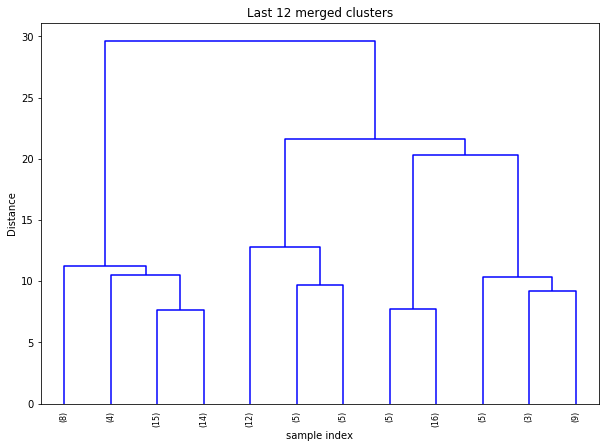

In [81]:
plt.figure(figsize=(10,7))
dendrogram(Z, leaf_rotation=90., color_threshold = 6, leaf_font_size=8., p=12, truncate_mode='lastp')
plt.title('Last 12 merged clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.tight_layout

### Q10. select an optimum number of clusters and predict the cluster label for the scaled_data

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

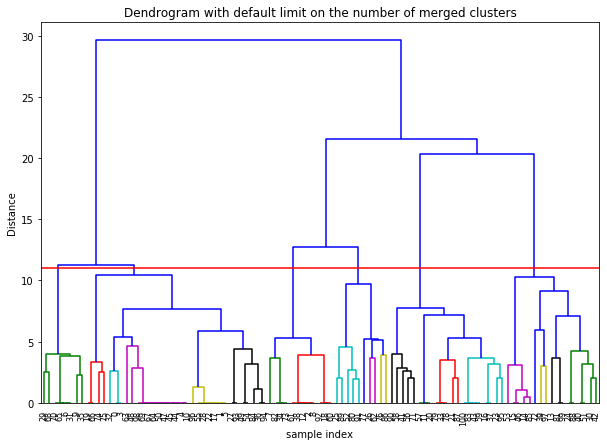

In [100]:
plt.figure(figsize=(10,7))
dendrogram(Z, leaf_rotation=90., color_threshold = 5, leaf_font_size=8.)
plt.title('Dendrogram with default limit on the number of merged clusters')
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.axhline(y = 11, color='r', linestyle='-')
plt.tight_layout

From visual analysis of the dendrogram, we see that optimal clustering occurs at an approximate distance of 11.
Let's try to form clusters at this distance and do the analysis of clusters formed accordingly.

In [101]:
from scipy.cluster.hierarchy import fcluster

In [102]:
clusters = fcluster(Z, t=11, criterion='distance')
clusters

array([2, 2, 3, 2, 2, 2, 1, 3, 3, 1, 2, 5, 3, 6, 6, 6, 5, 2, 3, 2, 5, 5,
       2, 5, 6, 4, 4, 2, 2, 1, 6, 1, 2, 5, 3, 1, 2, 5, 3, 6, 6, 5, 6, 5,
       2, 2, 6, 2, 2, 2, 2, 6, 4, 6, 2, 2, 5, 5, 5, 5, 3, 3, 4, 2, 2, 1,
       2, 2, 1, 2, 1, 5, 6, 3, 2, 2, 4, 4, 5, 5, 4, 6, 3, 5, 2, 6, 4, 5,
       6, 4, 5, 4, 3, 2, 2, 5, 2, 6, 2, 6, 5], dtype=int32)

Now, let's add these cluster labels to the dataset for analysis.

In [103]:
zoo_df_X['cluster_label'] = pd.DataFrame(clusters)

In [104]:
zoo_df_X.sample(5)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,cluster_label
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,2
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,4
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,5
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,2
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,2


Now, let's go for profiling of these formed clusters.

In [105]:
zoo_df_X.cluster_label.value_counts().sort_index()

1     8
2    33
3    12
4    10
5    21
6    17
Name: cluster_label, dtype: int64

In [106]:
zoo_df['label'] = pd.DataFrame(clusters)
profile_df = zoo_df.groupby('label').mean()
profile_df['freq'] = zoo_df.label.value_counts().sort_index()
profile_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,freq
label,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.250000,1.000000,1.0,1.000000,0.000000,0.000000,3.750000,0.750000,1.000000,0.750000,8
2,0.939394,0.000000,0.030303,1.0,0.060606,0.181818,0.606061,0.969697,1.0,1.000000,0.000000,0.121212,3.272727,0.878788,0.000000,0.787879,33
3,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.666667,1.000000,1.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.083333,0.250000,12
4,0.000000,0.000000,0.900000,0.0,0.000000,0.700000,0.900000,0.900000,0.9,0.700000,0.500000,0.100000,2.000000,0.600000,0.000000,0.100000,10
5,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.0,1.000000,0.000000,0.000000,2.095238,1.000000,0.142857,0.333333,21
6,0.235294,0.000000,0.941176,0.0,0.352941,0.294118,0.470588,0.000000,0.0,0.647059,0.176471,0.000000,5.000000,0.058824,0.058824,0.058824,17


For analysis of classification done in clusters, let's cross-validate against the given class in original dataset.

In [110]:
pd.crosstab(zoo_df_y, zoo_df_X['cluster_label'])

cluster_label,1,2,3,4,5,6
class_type,,,,,,
1,8,33,0,0,0,0
2,0,0,0,0,20,0
3,0,0,0,4,1,0
4,0,0,12,1,0,0
5,0,0,0,4,0,0
6,0,0,0,0,0,8
7,0,0,0,1,0,9


From above cross-validation, we understand that class_type = 1 from the dataset has been split up into 2 clusters having 33 and 8 records each.
Almost all clusters are good in defining similar records together, except clusters with label = 4 & 6. Both the clusters have a mix of records from different pre-defined class types, which shows that the clustering is not 100% perfect.
However, the clustering done is good since 4 clusters come close to defining the records similar to the pre-defined class from th roiginal dataset.